<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/DeepLearning/MNIST/Keras_220920_MNIST_%EC%8B%A4%EC%8A%B503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/MyDrive /mydrive

In [3]:
%cd /mydrive

/content/drive/MyDrive


In [4]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __callback/가중치규제/드롭아웃 활용__

### **1. Library Import**

In [5]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

In [6]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [7]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [8]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [10]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __try04 CNN 모델에 callback 적용__

---
EarlyStopping / ModelCheckPoint

In [11]:
import keras                                               # histroy 함수를 위해 import

### SGD

In [12]:
model_4 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 288)               0

In [13]:
model_4.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4 = model_4.fit(train_imgs, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/50
746/750 [============================>.] - ETA: 0s - loss: 1.2603 - accuracy: 0.6030
Epoch 1: val_accuracy improved from -inf to 0.87933, saving model to mnist/model_4.h5
750/750 [==============================] - 16s 6ms/step - loss: 1.2558 - accuracy: 0.6044 - val_loss: 0.3854 - val_accuracy: 0.8793
Epoch 2/50
743/750 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.9035
Epoch 2: val_accuracy improved from 0.87933 to 0.93067, saving model to mnist/model_4.h5
750/750 [==============================] - 4s 5ms/step - loss: 0.3133 - accuracy: 0.9038 - val_loss: 0.2261 - val_accuracy: 0.9307
Epoch 3/50
746/750 [============================>.] - ETA: 0s - loss: 0.2070 - accuracy: 0.9370
Epoch 3: val_accuracy improved from 0.93067 to 0.94933, saving model to mnist/model_4.h5
750/750 [==============================] - 4s 5ms/step - loss: 0.2067 - accuracy: 0.9371 - val_loss: 0.1720 - val_accuracy: 0.9493
Epoch 4/50
743/750 [============================>.] - 

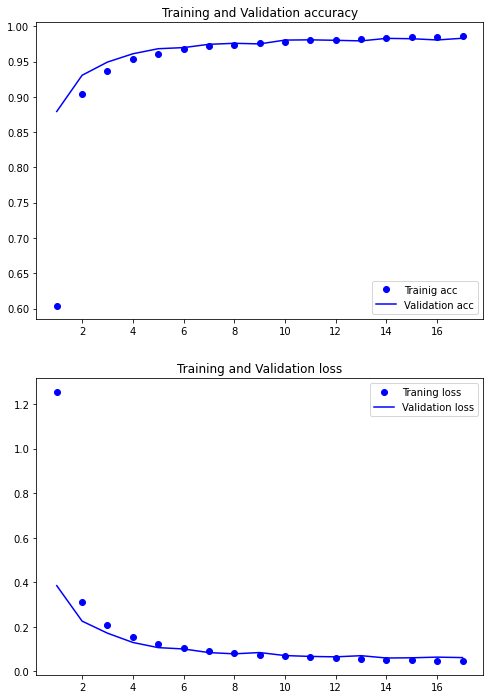

In [15]:
acc = hist_4.history['accuracy']
val_acc = hist_4.history['val_accuracy']
loss = hist_4.history['loss']
val_loss = hist_4.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [16]:
model_4.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9843


[0.04828539490699768, 0.9843000173568726]

### Adam

In [17]:
model_4_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])

In [18]:
model_4_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4_1 = model_4_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/30
750/750 [==============================] - ETA: 0s - loss: 0.3227 - accuracy: 0.9194
Epoch 1: val_accuracy improved from -inf to 0.97708, saving model to mnist/model_4_1.h5
750/750 [==============================] - 5s 6ms/step - loss: 0.3227 - accuracy: 0.9194 - val_loss: 0.0956 - val_accuracy: 0.9771
Epoch 2/30
746/750 [============================>.] - ETA: 0s - loss: 0.0726 - accuracy: 0.9804
Epoch 2: val_accuracy improved from 0.97708 to 0.98342, saving model to mnist/model_4_1.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.0725 - accuracy: 0.9804 - val_loss: 0.0587 - val_accuracy: 0.9834
Epoch 3/30
747/750 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9855
Epoch 3: val_accuracy improved from 0.98342 to 0.98492, saving model to mnist/model_4_1.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0544 - val_accuracy: 0.9849
Epoch 4/30
748/750 [============================>

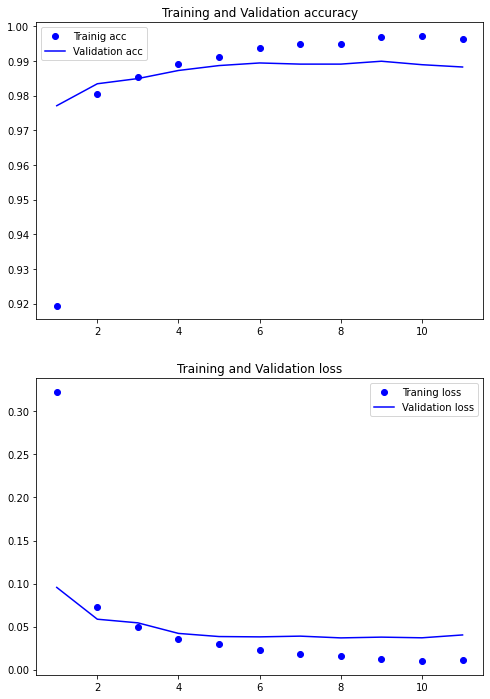

In [20]:
acc = hist_4_1.history['accuracy']
val_acc = hist_4_1.history['val_accuracy']
loss = hist_4_1.history['loss']
val_loss = hist_4_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [21]:
model_4_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0327 - accuracy: 0.9904


[0.0326966755092144, 0.9904000163078308]

### RMSprop

In [22]:
model_4_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])

In [23]:
model_4_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('mnist/model_4_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_4_2 = model_4_2.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/30
748/750 [============================>.] - ETA: 0s - loss: 0.2885 - accuracy: 0.9250
Epoch 1: val_accuracy improved from -inf to 0.98058, saving model to mnist/model_4_2.h5
750/750 [==============================] - 9s 9ms/step - loss: 0.2879 - accuracy: 0.9252 - val_loss: 0.0737 - val_accuracy: 0.9806
Epoch 2/30
742/750 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9806
Epoch 2: val_accuracy improved from 0.98058 to 0.98475, saving model to mnist/model_4_2.h5
750/750 [==============================] - 5s 6ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0548 - val_accuracy: 0.9847
Epoch 3/30
742/750 [============================>.] - ETA: 0s - loss: 0.0428 - accuracy: 0.9869
Epoch 3: val_accuracy improved from 0.98475 to 0.98592, saving model to mnist/model_4_2.h5
750/750 [==============================] - 4s 6ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0487 - val_accuracy: 0.9859
Epoch 4/30
745/750 [============================>

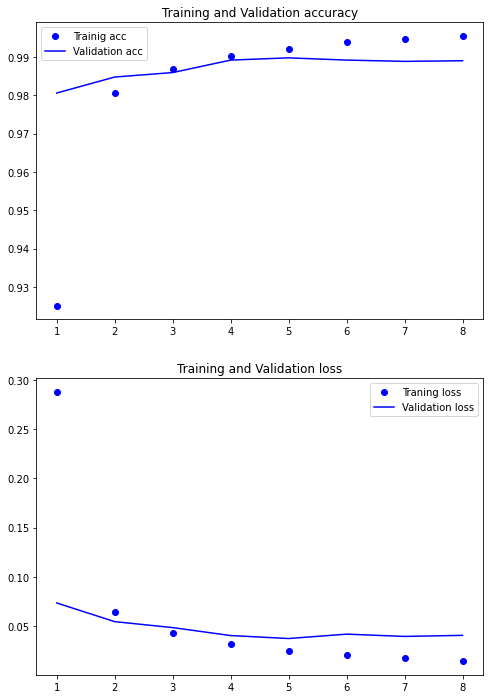

In [25]:
acc = hist_4_2.history['accuracy']
val_acc = hist_4_2.history['val_accuracy']
loss = hist_4_2.history['loss']
val_loss = hist_4_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [26]:
model_4_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9904


[0.03175080195069313, 0.9904000163078308]

### __try05 가중치 규제 추가(kernel_regularizer)__

In [27]:
from keras import regularizers

### SGD

In [28]:
model_5 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_3 (Flatten)         (None, 288)              

In [29]:
model_5.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
hist_5 = model_5.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 1.2686 - accuracy: 0.7091 - val_loss: 0.5942 - val_accuracy: 0.8917
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5229 - accuracy: 0.9128 - val_loss: 0.4427 - val_accuracy: 0.9391
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.4258 - accuracy: 0.9410 - val_loss: 0.3883 - val_accuracy: 0.9527
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3753 - accuracy: 0.9562 - val_loss: 0.3525 - val_accuracy: 0.9632
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3457 - accuracy: 0.9642 - val_loss: 0.3290 - val_accuracy: 0.9697
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.3251 - accuracy: 0.9686 - val_loss: 0.3234 - val_accuracy: 0.9676
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3086 - accuracy: 0.9724 - val_loss: 0.3067 - val_accuracy: 0.9724
Epoch 

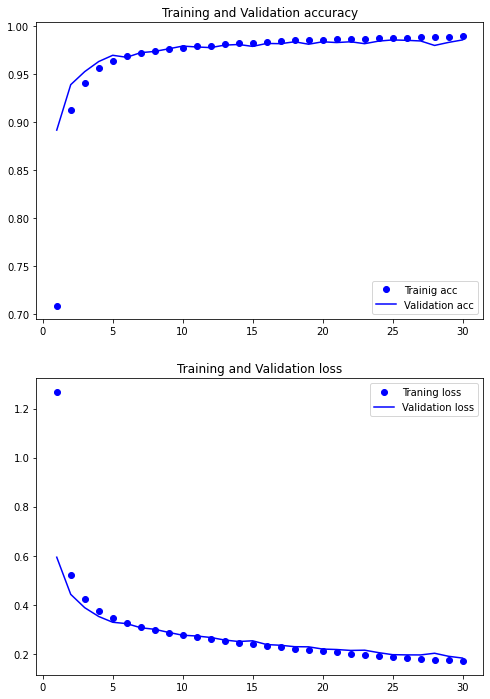

In [31]:
acc = hist_5.history['accuracy']
val_acc = hist_5.history['val_accuracy']
loss = hist_5.history['loss']
val_loss = hist_5.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [32]:
model_5.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.9883


[0.17075879871845245, 0.9883000254631042]

### Adam

In [33]:
model_5_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_5_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_4 (Flatten)         (None, 288)              

In [34]:
model_5_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
hist_5_1 = model_5_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.4877 - accuracy: 0.9157 - val_loss: 0.2404 - val_accuracy: 0.9705
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2065 - accuracy: 0.9737 - val_loss: 0.1744 - val_accuracy: 0.9800
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1667 - accuracy: 0.9794 - val_loss: 0.1687 - val_accuracy: 0.9740
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1440 - accuracy: 0.9823 - val_loss: 0.1472 - val_accuracy: 0.9794
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1338 - accuracy: 0.9829 - val_loss: 0.1467 - val_accuracy: 0.9769
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1292 - accuracy: 0.9830 - val_loss: 0.1303 - val_accuracy: 0.9826
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1221 - accuracy: 0.9838 - val_loss: 0.1337 - val_accuracy: 0.9783
Epoch 

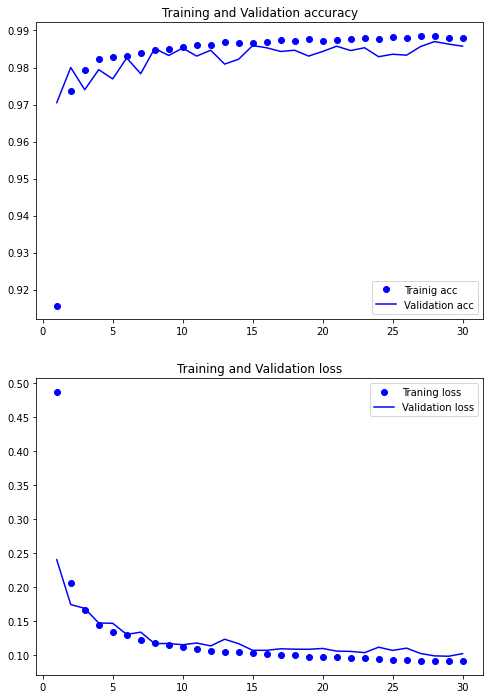

In [36]:
acc = hist_5_1.history['accuracy']
val_acc = hist_5_1.history['val_accuracy']
loss = hist_5_1.history['loss']
val_loss = hist_5_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [37]:
model_5_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9884


[0.09000468254089355, 0.9883999824523926]

### RMSProp

In [38]:
model_5_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_5_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 flatten_5 (Flatten)         (None, 288)              

In [39]:
model_5_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [40]:
hist_5_2 = model_5_2.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.4680 - accuracy: 0.9181 - val_loss: 0.2234 - val_accuracy: 0.9727
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1959 - accuracy: 0.9725 - val_loss: 0.1956 - val_accuracy: 0.9688
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1570 - accuracy: 0.9786 - val_loss: 0.1387 - val_accuracy: 0.9812
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1399 - accuracy: 0.9802 - val_loss: 0.1267 - val_accuracy: 0.9837
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1292 - accuracy: 0.9814 - val_loss: 0.1306 - val_accuracy: 0.9803
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1228 - accuracy: 0.9825 - val_loss: 0.1258 - val_accuracy: 0.9822
Epoch 7/30
750/750 [==============================] - 5s 6ms/step - loss: 0.1184 - accuracy: 0.9826 - val_loss: 0.1264 - val_accuracy: 0.9806
Epoch 

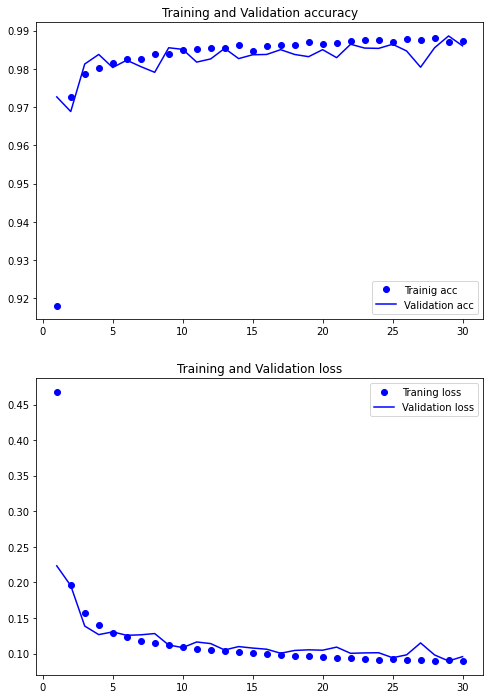

In [41]:
acc = hist_5_2.history['accuracy']
val_acc = hist_5_2.history['val_accuracy']
loss = hist_5_2.history['loss']
val_loss = hist_5_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [42]:
model_5_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9874


[0.08974717557430267, 0.9873999953269958]

### __try06 드롭아웃 추가(Dropout)__

### SGD

In [43]:
model_6 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 32)         

In [44]:
model_6.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
hist_6 = model_6.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.9619 - accuracy: 0.6826 - val_loss: 0.4295 - val_accuracy: 0.9178
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3362 - accuracy: 0.8949 - val_loss: 0.2515 - val_accuracy: 0.9482
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2362 - accuracy: 0.9271 - val_loss: 0.1865 - val_accuracy: 0.9598
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1936 - accuracy: 0.9397 - val_loss: 0.1578 - val_accuracy: 0.9657
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1670 - accuracy: 0.9484 - val_loss: 0.1365 - val_accuracy: 0.9714
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1477 - accuracy: 0.9544 - val_loss: 0.1235 - val_accuracy: 0.9730
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1359 - accuracy: 0.9575 - val_loss: 0.1099 - val_accuracy: 0.9761
Epoch 

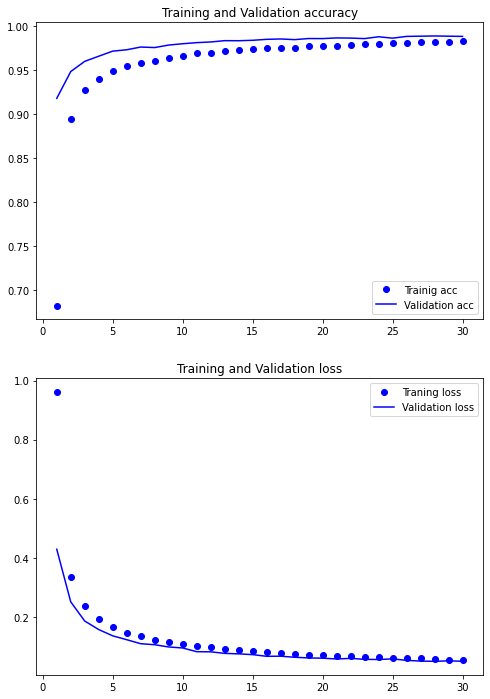

In [46]:
acc = hist_6.history['accuracy']
val_acc = hist_6.history['val_accuracy']
loss = hist_6.history['loss']
val_loss = hist_6.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [47]:
model_6.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9889


[0.04516183212399483, 0.9889000058174133]

### Adam

In [48]:
model_6_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_6_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 32)         

In [49]:
model_6_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
hist_6_1 = model_6_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.3567 - accuracy: 0.9039 - val_loss: 0.0929 - val_accuracy: 0.9759
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0975 - accuracy: 0.9718 - val_loss: 0.0539 - val_accuracy: 0.9861
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0681 - accuracy: 0.9799 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0395 - val_accuracy: 0.9884
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0333 - val_accuracy: 0.9903
Epoch 

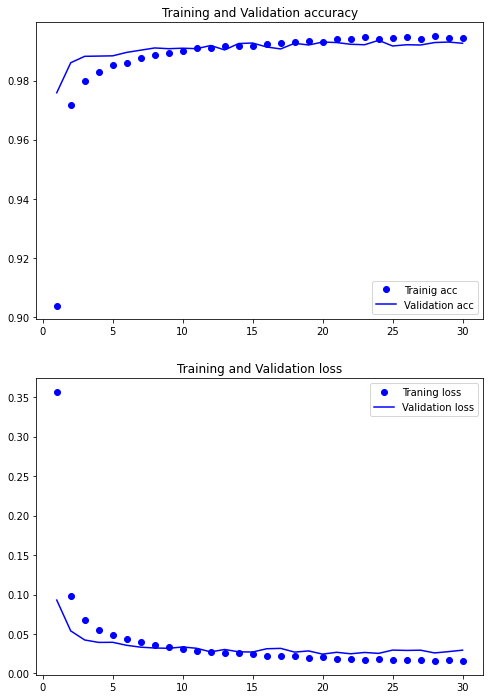

In [51]:
acc = hist_6_1.history['accuracy']
val_acc = hist_6_1.history['val_accuracy']
loss = hist_6_1.history['loss']
val_loss = hist_6_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [52]:
model_6_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9939


[0.02217540517449379, 0.9939000010490417]

### RMSProp

In [53]:
model_6_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_6_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 32)         

In [54]:
model_6_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [55]:
hist_6_2 = model_6_2.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.3446 - accuracy: 0.9075 - val_loss: 0.0875 - val_accuracy: 0.9755
Epoch 2/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0957 - accuracy: 0.9715 - val_loss: 0.0581 - val_accuracy: 0.9840
Epoch 3/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0674 - accuracy: 0.9786 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 4/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 5/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0394 - val_accuracy: 0.9889
Epoch 

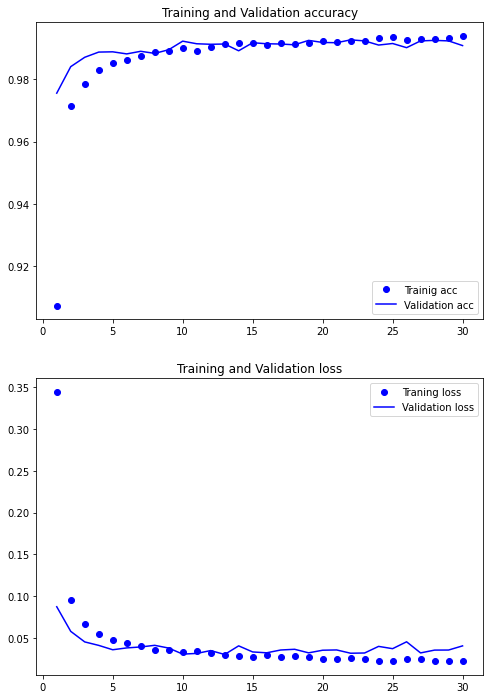

In [56]:
acc = hist_6_2.history['accuracy']
val_acc = hist_6_2.history['val_accuracy']
loss = hist_6_2.history['loss']
val_loss = hist_6_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [57]:
model_6_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9915


[0.03359248489141464, 0.9915000200271606]